In [1]:
# %matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
import scipy.signal
import skimage
import skimage.io
import skimage.transform

import scipy.stats as st

from PIL import Image
import cv2

# PIL rgb
# skimage rgb
# scipy rgb
# tensorflow rgb

In [189]:
rootpath = tf.constant("/home/llhan/workspace/learn_dl/bs/dataset2014_bak/")

In [190]:
a = tf.constant([[1,1],[2,2]], dtype=tf.int8)

b = (a > 1)
c = (a !=2)
d = tf.equal(a, 2)

d

In [ ]:
# decode_csv, reduce_join, read_file, image.decode

In [181]:
def gauss_kernel( kernlen=21, nsig=3, channels=1):
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    print kern1d
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    out_filter = np.array(kernel, dtype = np.float32)
    out_filter = out_filter.reshape((kernlen, kernlen, 1, 1))
    out_filter = np.repeat(out_filter, channels, axis = 2)
    return out_filter

In [186]:
a = gauss_kernel(3,3,1)

[0.08241782 0.83513346 0.08241782]


In [187]:
a.shape

(3, 3, 1, 1)

In [188]:
a[:,:,0,0]

array([[0.03722201, 0.11848605, 0.03722201],
       [0.11848605, 0.3771678 , 0.11848605],
       [0.03722201, 0.11848605, 0.03722201]], dtype=float32)

In [185]:
a[:,:,1,0]

IndexError: index 1 is out of bounds for axis 2 with size 1

In [2]:
img1 = cv2.imread("juri1.jpg")

In [96]:
img2 = cv2.pyrDown(img1)

In [97]:
img1.shape, img2.shape, img2.dtype

((600, 423, 3), (300, 212, 3), dtype('uint8'))

In [98]:
kernel = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]], dtype=np.float32) * 1./256
kernel1 = np.array([[1,4,6,4,1]], dtype=np.float32) * 1./16
kernel2 = np.array([[1,4,6,4,1]], dtype=np.float32).T * 1./16

In [99]:
b = scipy.signal.convolve2d(img1[:,:,0], kernel1, mode="same")
g = scipy.signal.convolve2d(img1[:,:,1], kernel1, mode="same")
r = scipy.signal.convolve2d(img1[:,:,2], kernel1, mode="same")

In [100]:
b = scipy.signal.convolve2d(b, kernel2, mode="same")
g = scipy.signal.convolve2d(g, kernel2, mode="same")
r = scipy.signal.convolve2d(r, kernel2, mode="same")

In [101]:
img3 = np.stack([b,g,r],axis=-1)

In [102]:
img4 = img3[0::2, 0::2, :].astype(np.uint8)

In [123]:
cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.imshow("img4", img4)
cv2.imshow("a", img1[0::2, 0::2, :])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [109]:
cv2.destroyAllWindows()

In [112]:
(img4 == img2).sum()

93651

In [95]:
cv2.imshow("abs", np.abs(img4 - img2)[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [117]:
(np.abs(img4 - img2) <= 200).sum()

94747

In [122]:
cv2.imshow("a", img1[0::2, 0::2, :])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [120]:
(img4 > 230).sum()

24364

In [119]:
(img2 > 230).sum()

25448

In [23]:
img4.dtype

dtype('float32')

In [24]:
img2.dtype

dtype('uint8')

In [2]:
img1 = scipy.misc.imread("juri1.jpg")  #rgb

In [4]:
img1[1]

array([[155, 174, 168],
       [ 26,  48,  46],
       [ 21,  44,  50],
       ..., 
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250]], dtype=uint8)

In [44]:
img2 = skimage.io.imread("juri1.jpg") #rgb

In [45]:
img2?

In [8]:
img2[1]

array([[155, 174, 168],
       [ 26,  48,  46],
       [ 21,  44,  50],
       ..., 
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250]], dtype=uint8)

In [5]:
img1 = np.array(Image.open("juri1.jpg"))  #PIL is also rgb

In [15]:
img3 = img3[:,:,::-1]

In [16]:
img3[1]

array([[168, 174, 155],
       [ 46,  48,  26],
       [ 50,  44,  21],
       ..., 
       [250, 250, 250],
       [250, 250, 250],
       [250, 250, 250]], dtype=uint8)

In [149]:
sigma=1
p = np.polynomial.Polynomial([0, 0, -0.5 / (sigma * sigma)])
radius=3/4.+0.5
x = np.arange(-radius, radius + 1)

In [150]:
p,x

(Polynomial([ 0. ,  0. , -0.5], domain=[-1,  1], window=[-1,  1]),
 array([-1.25, -0.25,  0.75,  1.75]))

In [151]:
p(x)

array([-0.78125, -0.03125, -0.28125, -1.53125])

In [130]:
img11 = img1[:,:,::-1]

In [131]:
a = skimage.transform.pyramid_gaussian(img11, max_layer=2, downscale=2)

In [139]:
b[0].dtype

dtype('float64')

In [141]:
((b[0] * 255) == img11).sum()

761400

In [ ]:
(b[0] == img11)

In [132]:
b = list(a)

In [133]:
print b[0].shape, b[0].dtype

(600, 423, 3) float64


In [134]:
b[1].shape

(300, 212, 3)

In [135]:
b[2].shape

(150, 106, 3)

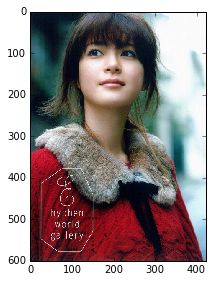

In [136]:
skimage.io.imshow(b[0])

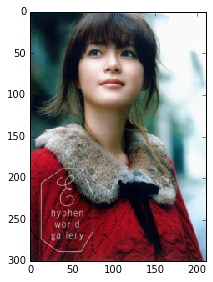

In [137]:
skimage.io.imshow(b[1])

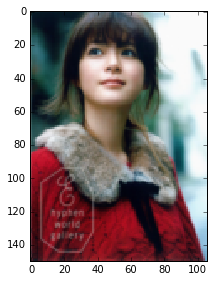

In [138]:
skimage.io.imshow(b[2])